# Creating the 'Particle in a Box' model in Python

The aim of this notebook will to find the energy and eigenstates of the 'Particle in a Box' model. This will be achieved using several different methods, first the Schrodinger equation for a particle in a box will be solved using the Runge-Kutta method and plotted. This equation has the form:

Equation 1:
$$
-\frac{1}{2}  \frac{d^2}{dx^2} ψ(x)=Eψ(x)
$$

Where E is the energy of the particle.

After this boundary conditions will begin to be applied, intially a bisection method will be used to ensure ψ(x) = 0 at the boundary of the 'box'. Then this function of values will be normalised using an integration function and a normalisation factor will be added to the wavefunction. 

Then it will be possible to compare the numerical result of the wavefunction of a particle in a box that has been developed throughout the notebook to an analytic result.

All values and equations given are in atomic units.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib notebook

###  Schrodinger Equation couple function

This rearranges Eq 1. into two new equations, it adds in a new variable 'phi' which helps to create two 'coupled' equations so that the differential may be solved within python. The coupled equations are show here:

Equation 2:
$$
\frac{dψ}{dx} = \phi
$$

Equation 3:
$$
\frac{d\phi}{dx}= -2E\psi(x)
$$

In [4]:
def RHS_Schro(y,E):
    """Implement RHS of Schrodinger equation
    
    Input:
    y  function values (two component array)
    E  Energy
    Returns:
    Differentials (two component array)
    """
    #values
    psi = y[0]
    phi = y[1]
    #differentials
    dpsi = phi        #eq2
    dphi = -2*E*psi   #eq3        
    
    return np.array((dpsi,dphi))

### Runge Kutta Solver function

In [5]:
def RK4_solver(fun,y0,dx,E,N):
    """Solve dy/dx = fun(y,x) using fourth-order RK method.
    Inputs:
    fun  f(y,x)
    y0   Initial conditions - assumed to be two-component
    dx   Spacing in x
    E    Parameter to pass to fun
    N    Number of steps
    Returns: two arrays of length N+1
    """
    #creating arrays
    psi = np.linspace(0,dx*(N+1),(N+1)) 
    psi[0] = y0[0]
    phi = np.linspace(0,dx*(N+1),(N+1))
    phi[0] = y0[1]
    y=y0            
    
    #rk4 method
    for i in range(N):
        k1 = dx*fun(y,E)
        k2 = dx*fun(y+k1/2,E)
        k3 = dx*fun(y+k2/2,E)
        k4 = dx*fun(y+k3,E)
        y = y + (1/6)*(k1+2*k2+2*k3+k4)
        #updating arrays
        psi[i+1] = y[0]
        phi[i+1] = y[1]
    
    return psi, phi

### Testing the wavefunction

In this test the energy value, E, has been set to 1 Hartree, this gives an idea of the brackets of energy that will be needed for the bisection method.

<IPython.core.display.Javascript object>


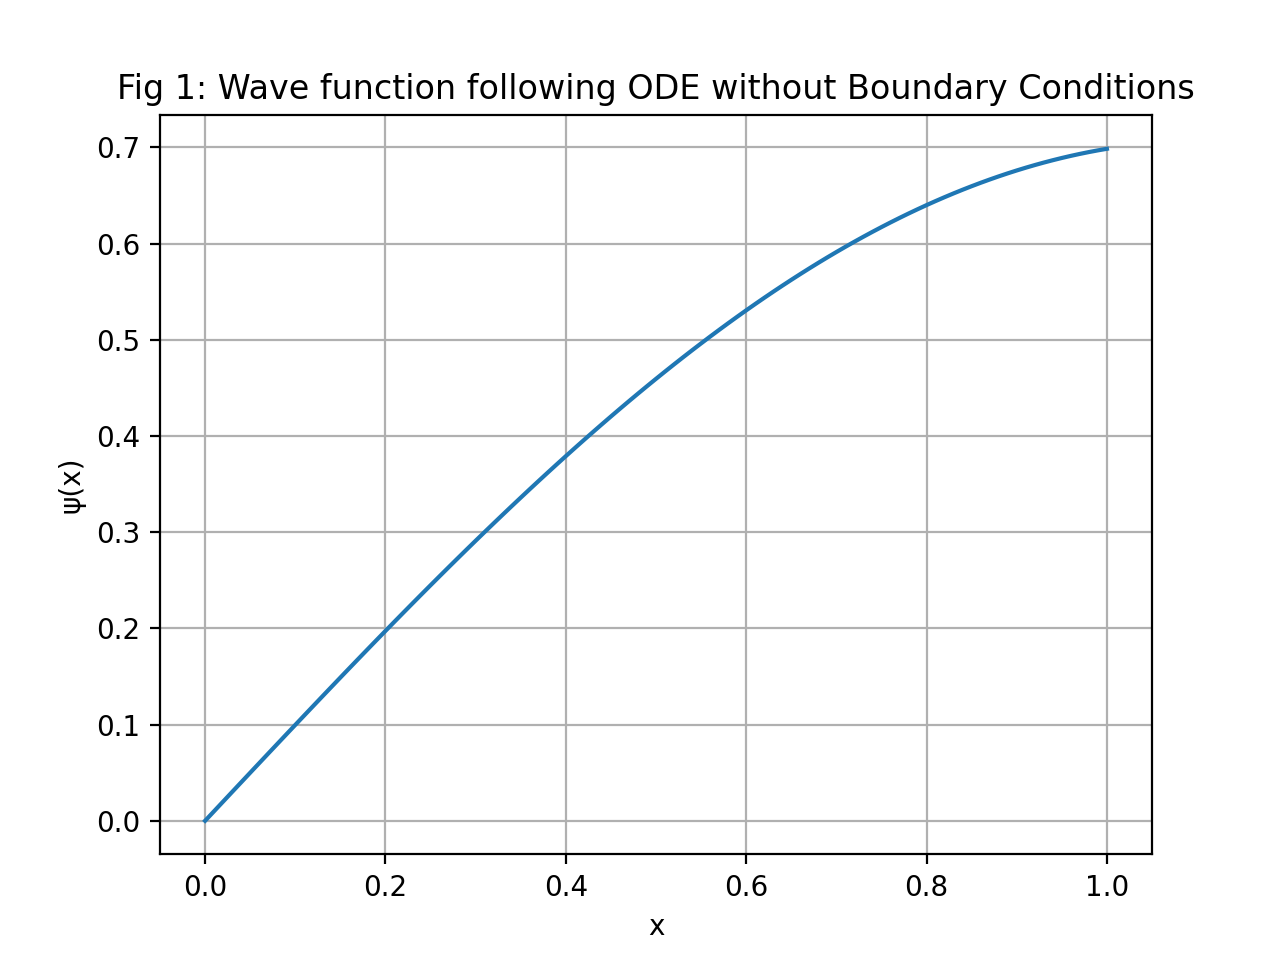

In [6]:
#setting values
dx = 0.01
E0 = 1
psi0 = np.array([0.0,1.0])
N = int(1/dx)
x = np.arange(0,(N+1)*dx,dx)

#plotting
psi, phi = RK4_solver(RHS_Schro,psi0,dx,E0,N)
plt.plot(x,psi)
plt.grid()
plt.xlabel('x')
plt.ylabel('ψ(x)')
plt.title("Fig 1: Wave function following ODE without Boundary Conditions")

P0 = psi[N]

### Bisection method 
Fnding an energy value that satifies 'Particle in a Box' model. A tolerance is included in this method which has been carefully selected to be 1e-10 as beyond this point the accuracy does not increase reliably, the upshot being that only 34 iterations are required to reach this accuracy.

This took 34 iterations
Energy: 4.934802280855365 Hartrees
ψ(1)= -2.2610168945447207e-11


<IPython.core.display.Javascript object>


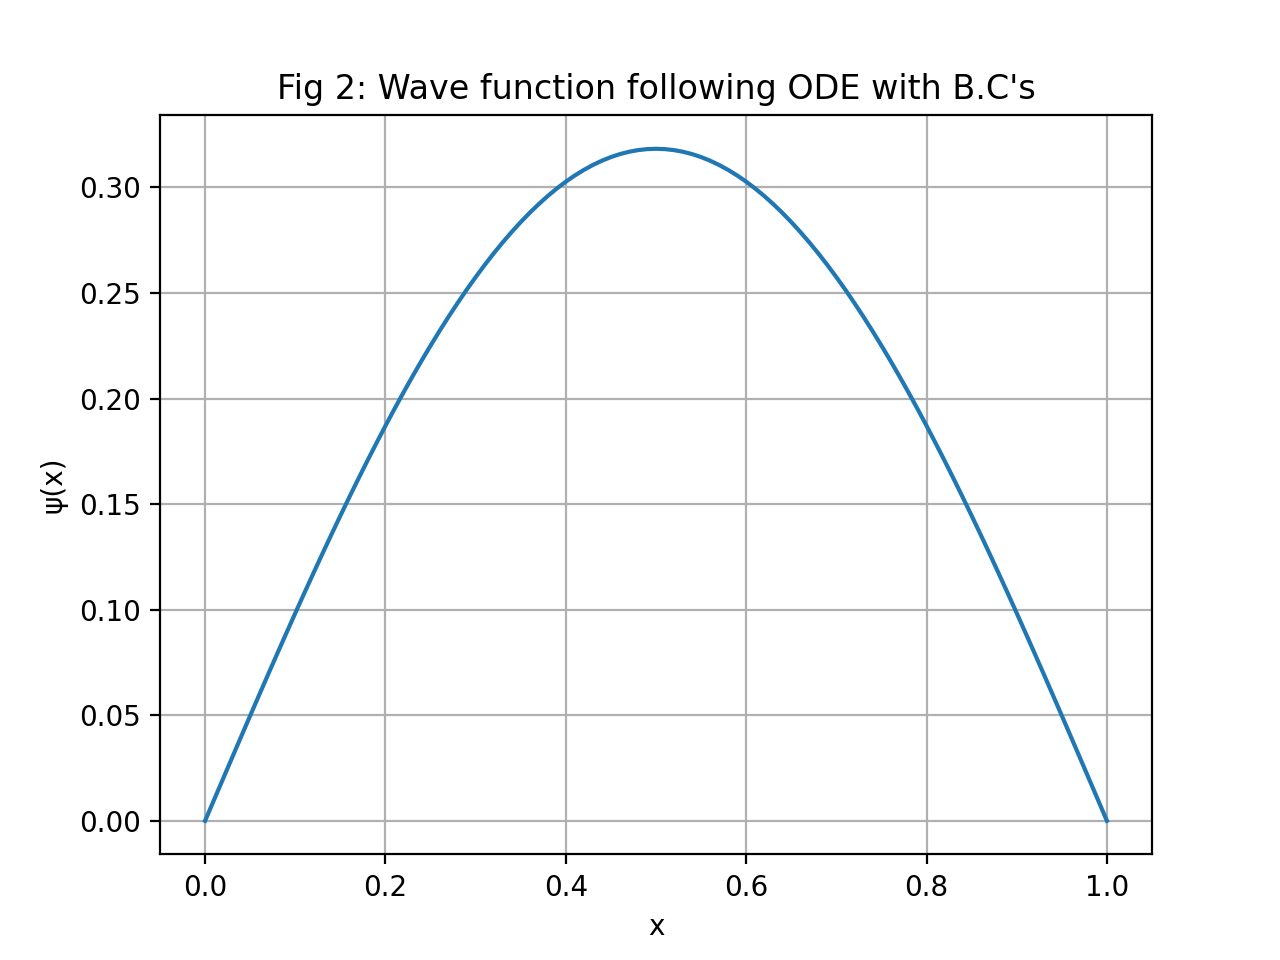

Text(0.5, 1.0, "Fig 2: Wave function following ODE with B.C's")

In [7]:
tol = 1e-10

# Lower limit
E0 = 1.0
psi_0, phi_0 = RK4_solver(RHS_Schro,psi0,dx,E0,N)
P0 = psi_0[N]

# Upper limit
E1 = 11.0
psi_1, phi_1 = RK4_solver(RHS_Schro,psi0,dx,E1,N)
P1 = psi_1[N]

#counter
n = 0

#bisection method
while abs(P1-P0) > tol:
    E = (E0+E1)/2
    psi_0, phi_0 = RK4_solver(RHS_Schro,psi0,dx,E0,N)
    psi_1, phi_1 = RK4_solver(RHS_Schro,psi0,dx,E1,N)
    psi, phi = RK4_solver(RHS_Schro,psi0,dx,E,N)
    if psi_0[N] * psi[N] > 0.0:
        E0 = E
        P0 = psi[N]
    else:
        E1 = E
        P1 = psi[N]
    n += 1
    
#outputting
print('This took',n,'iterations')
print('Energy:',E,'Hartrees')
print('ψ(1)=',psi[N])

#plotting
plt.plot(x,psi)
plt.grid()
plt.xlabel('x')
plt.ylabel('ψ(x)')
plt.title("Fig 2: Wave function following ODE with B.C's")

### Normalising the wavefunction

So far the wavefunction that has values of 0 at both x = 0 and x = 1 has been found. Now the final boundary condition of normalisation must be applied. To do this we must add a normalisation factor to the wavefunction to ensure that the integral of its probability density within the box equals 1. An equation has been given below to show how this factor is found:

Equation 4:
$$
∫_0^1∣ψ(x)∣^2 dx=1
$$

Normalisation constant for the numerical function is  1.0


<IPython.core.display.Javascript object>


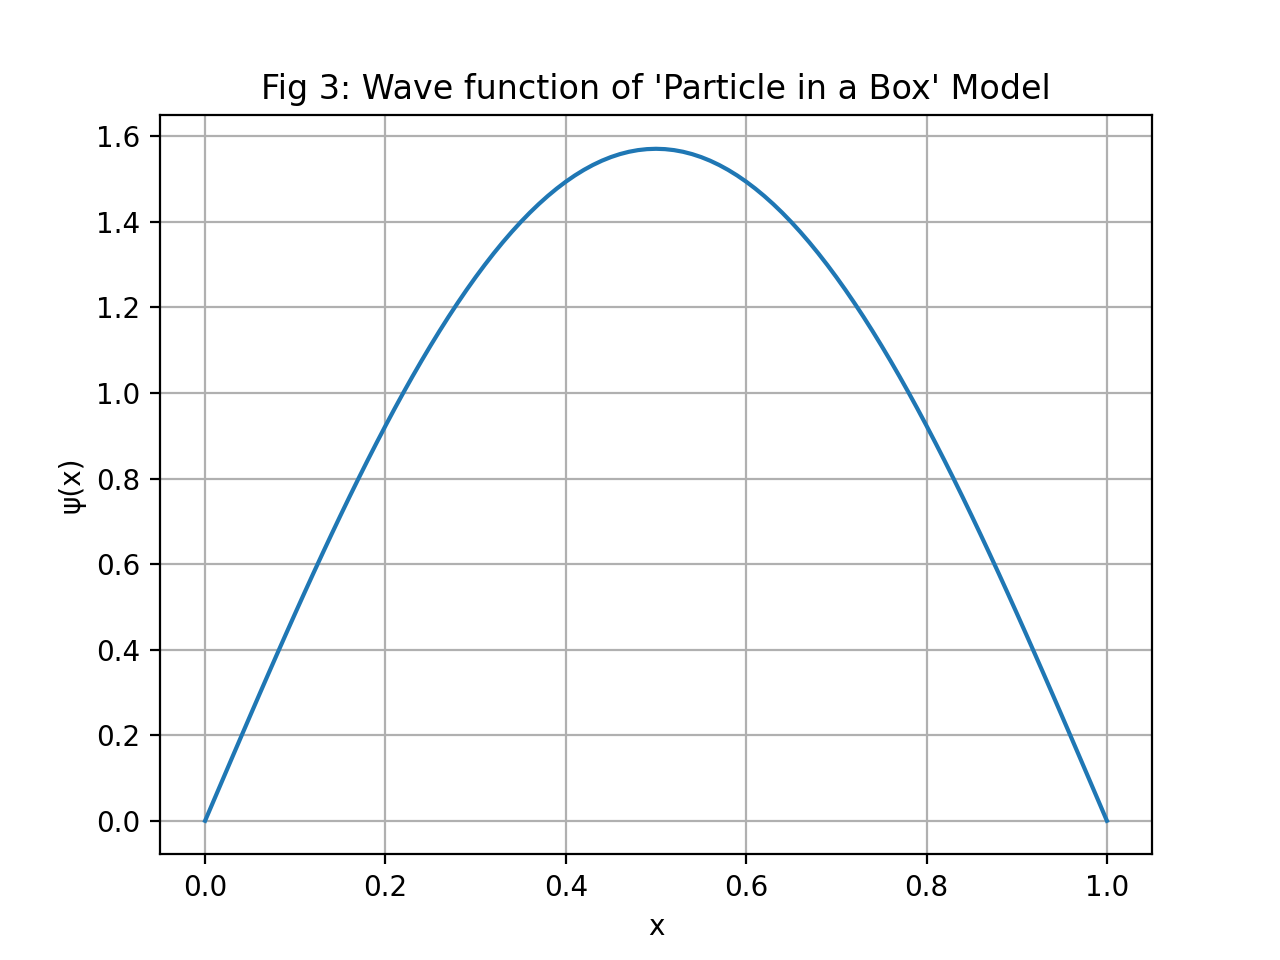

Text(0.5, 1.0, "Fig 3: Wave function of 'Particle in a Box' Model")

In [11]:
#normalising
norm = (integrate.simps(psi,x))**2
print("Normalisation constant for the numerical function is ",norm)
psi = psi/np.sqrt(norm)

#plotting
plt.plot(x,psi)
plt.grid()
plt.xlabel('x')
plt.ylabel('ψ(x)')
plt.title("Fig 3: Wave function of 'Particle in a Box' Model")

### Comparison to Analytic Wavefunction

In [12]:
#setting values
k = np.pi
B = 1

#arrays
x = np.arange(0,(N+1)*dx,dx)
psi_ana = np.sin(k*x)

#normalising
norm = (integrate.simps(psi_ana,x))**2
print("Normalisation constant for the analytic function is ",norm)
psi_ana = psi_ana/np.sqrt(norm)

Normalisation constant for the analytic function is  0.40528473895635725


<IPython.core.display.Javascript object>


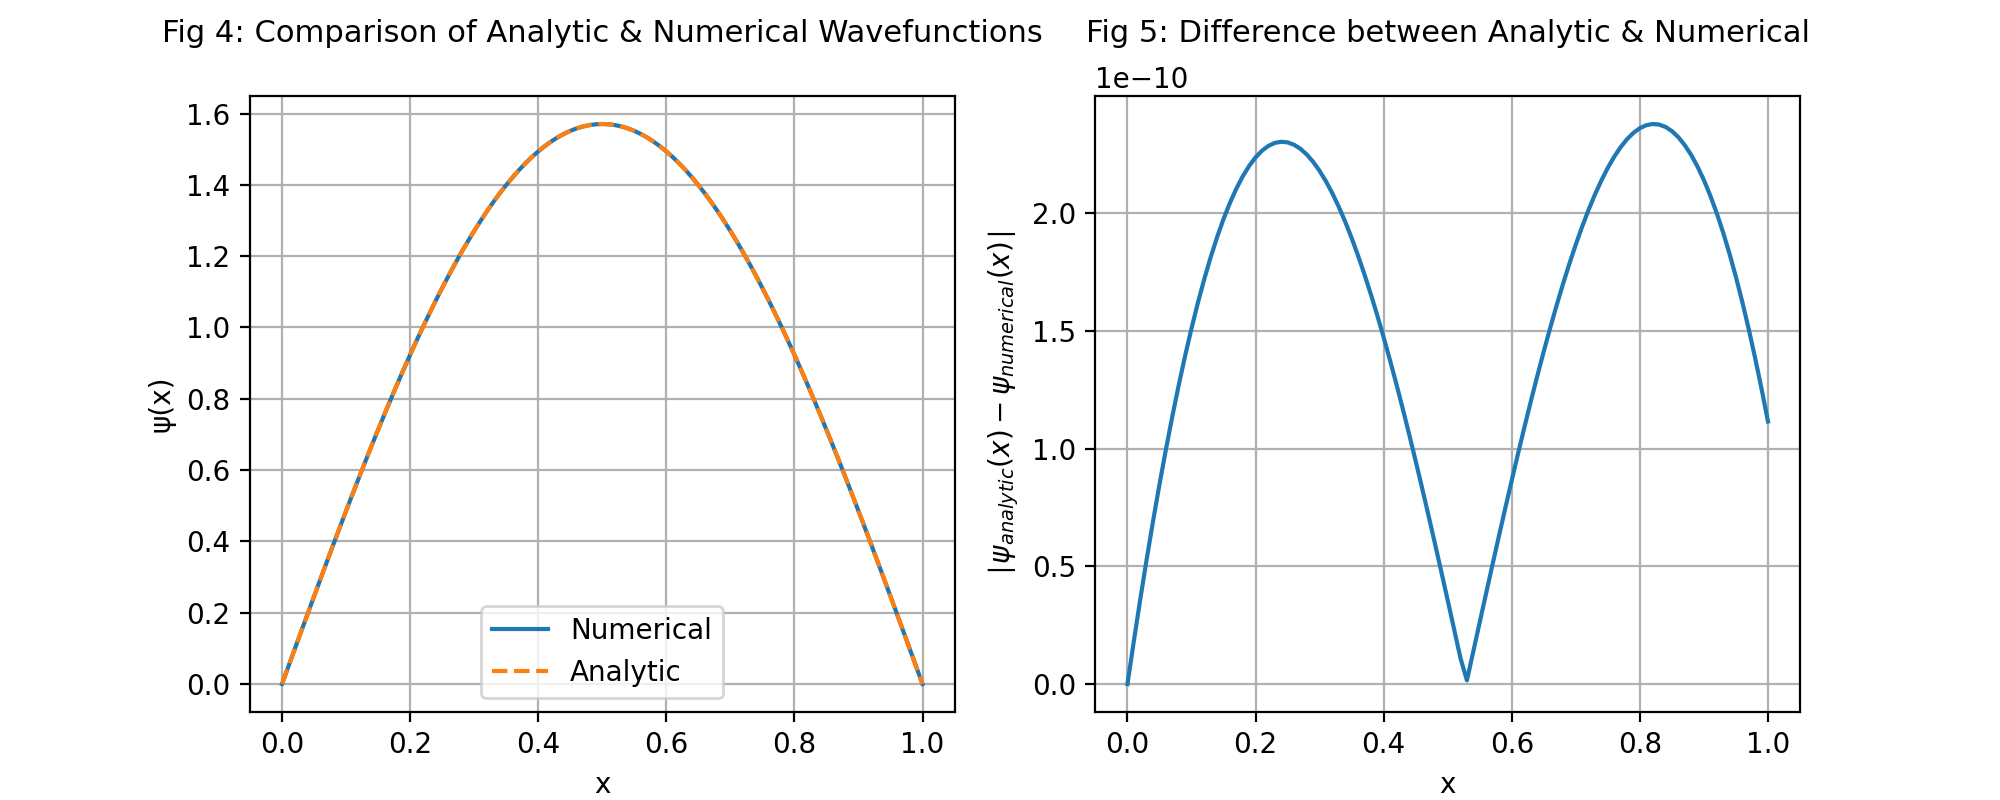

Text(0.5, 1.06, 'Fig 5: Difference between Analytic & Numerical')

In [13]:
#plotting
fig = plt.figure(figsize=(10,4))

#axis 1
ax1 = fig.add_subplot(1,2,1)
ax1.plot(x,psi,label='Numerical')
ax1.plot(x,psi_ana,'--',label='Analytic')
ax1.grid()
ax1.set_xlabel('x')
ax1.set_ylabel('ψ(x)')
ax1.legend()
ax1.set_title("Fig 4: Comparison of Analytic & Numerical Wavefunctions",y=1.06,fontsize=11)

#axis 2
ax2 = fig.add_subplot(1,2,2)
ax2.plot(x,abs(psi-psi_ana),label='Numerical')
ax2.grid()
ax2.set_xlabel('x')
ax2.set_ylabel(r'$∣ψ_{analytic}(x)-ψ_{numerical}(x)∣$')
ax2.set_title("Fig 5: Difference between Analytic & Numerical",y=1.06,fontsize=11)

### Conclusion

From the graphs above it is possible to see that the model wavefunction developed in this notebook is extremely similar to the wavefunction that was obtained analytically. After varying the tolerance level in the bisection method section it is possible to see from Fig 5 that the magnitude of the difference between the analytic and numerical values is dependent on this tolerance up until 1e-10, for values smaller than this the difference stays the same.